In [6]:
# Importing necessary libraries
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore

from scipy.signal import butter, filtfilt # type: ignore
from Lab3Functions import get_power, get_bursts, import_data




Zusätzliche Funktionen


In [2]:
# def butter_filter(data, lowcut, highcut, fs, order=4):
#     nyquist = 0.5 * fs
#     low = lowcut / nyquist
#     high = highcut / nyquist
#     b, a = butter(order, [low, high], btype='band')
#     filtered_data = filtfilt(b, a, data)
#     return filtered_data

# # Function to rectify the EMG signal
# def rectify_signal(data):
#     return np.abs(data)

# # Function to apply low-pass filter for envelope detection
# def lowpass_filter(data, cutoff, fs, order=4):
#     nyquist = 0.5 * fs
#     low = cutoff / nyquist
#     b, a = butter(order, low, btype='low')
#     envelope = filtfilt(b, a, data)
#     return envelope


Hauptprogramm

In [5]:
# # Jupyter Notebook Main Function
# from matplotlib import figure
# from matplotlib.figure import Figure


# def process_emg(file_name, separator, sampling_frequency, lowcut, highcut, envelope_cutoff):
#     # Import data
#     data = pd.read_csv(file_name, sep=separator)
#     emg_raw = data['emg'].values
#     time = data['time'].values

#     # Step (a): Remove offset
#     offset = np.mean(emg_raw)
#     emg_offset_removed = emg_raw - offset

#     # Step (b): Bandpass filter the signal
#     mvc_emg_filtered = butter_filter(emg_offset_removed, lowcut, highcut, sampling_frequency)

#     # Step (c): Rectify the signal
#     emg_rectified = rectify_signal(mvc_emg_filtered)

#     # Step (d): Apply low-pass filter to extract envelope
#     emg_envelope = lowpass_filter(emg_rectified, envelope_cutoff, sampling_frequency)

#     # Plot the results
#     fig, axs = plt.subplots(4, 1, figsize=(12, 8))

#     axs[0].plot(time, emg_raw)
#     axs[0].set_title('Raw EMG Signal')
#     axs[0].set_xlabel('Time (s)')
#     axs[0].set_ylabel('Amplitude')

#     axs[1].plot(time, emg_offset_removed)
#     axs[1].set_title('Offset Removed')
#     axs[1].set_xlabel('Time (s)')
#     axs[1].set_ylabel('Amplitude')

#     axs[2].plot(time, mvc_emg_filtered)
#     axs[2].set_title('Bandpass Filtered (20-450 Hz)')
#     axs[2].set_xlabel('Time (s)')
#     axs[2].set_ylabel('Amplitude')

#     axs[3].plot(time, emg_envelope)
#     axs[3].set_title('Envelope of Rectified Signal')
#     axs[3].set_xlabel('Time (s)')
#     axs[3].set_ylabel('Amplitude')

#     plt.tight_layout()
#     plt.show()
    
# # Example usage for Jupyter Notebook
# file_name = 'Feli2.csv'  # Update this with your file path 
# separator = ';'          # Separator used in the CSV file
# sampling_frequency = 1000  # Hz
# lowcut = 20  # Hz
# highcut = 450  # Hz
# envelope_cutoff = 10  # Hz



# process_emg(file_name, separator, sampling_frequency, lowcut, highcut, envelope_cutoff)


Plots saved as 'mvc_emg_filtered_bursts.png', 'weights_emg_filtered_bursts.png', and 'fatigue_emg_filtered_bursts.png' for manual burst analysis.


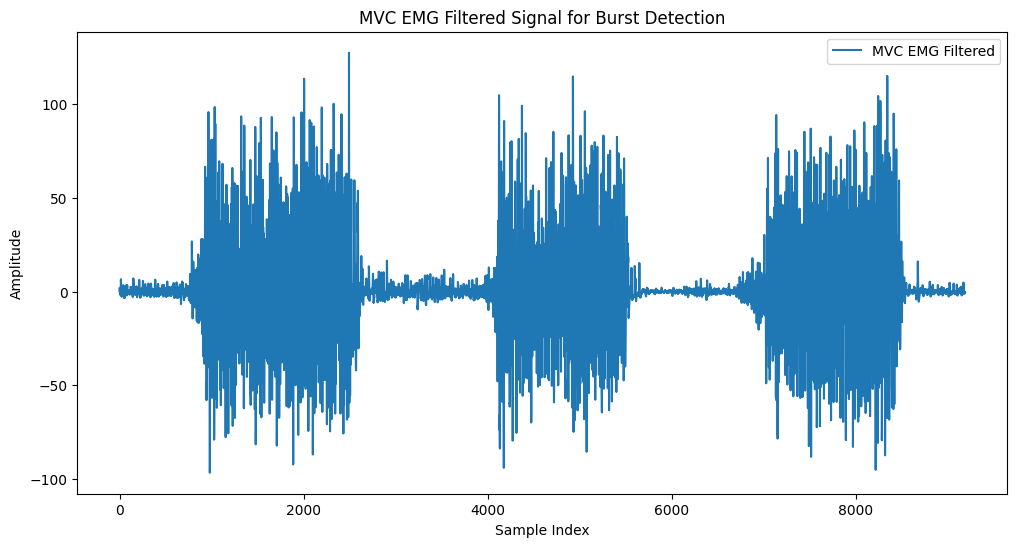

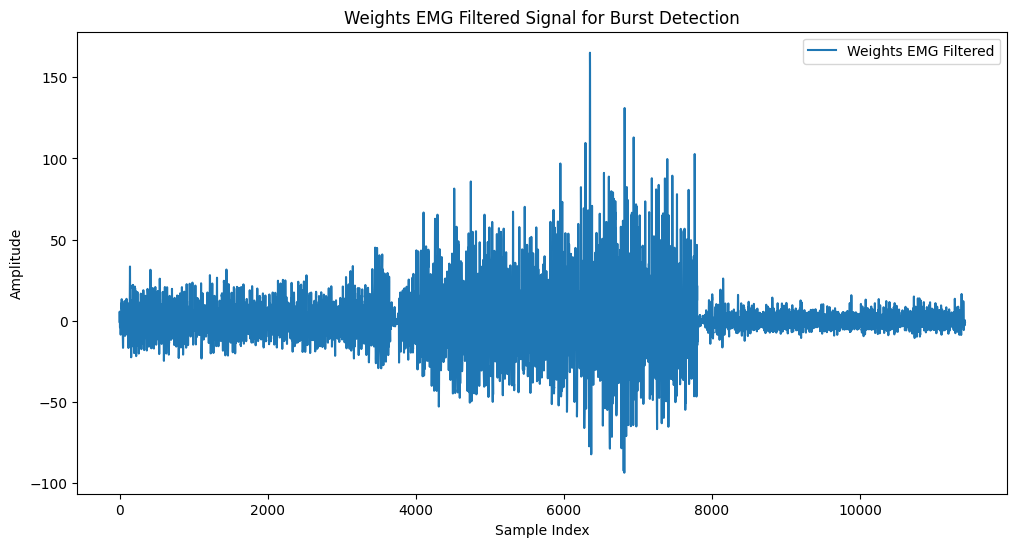

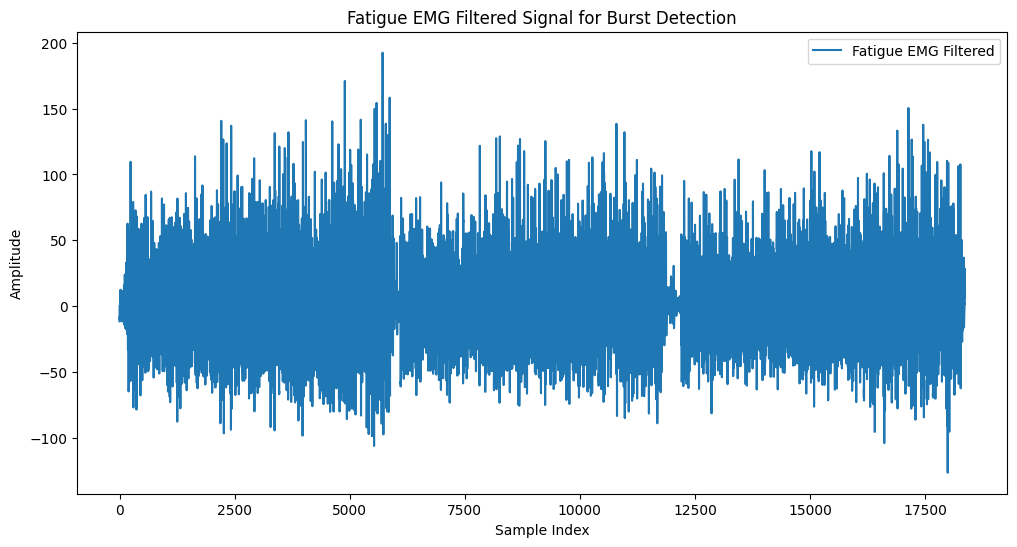

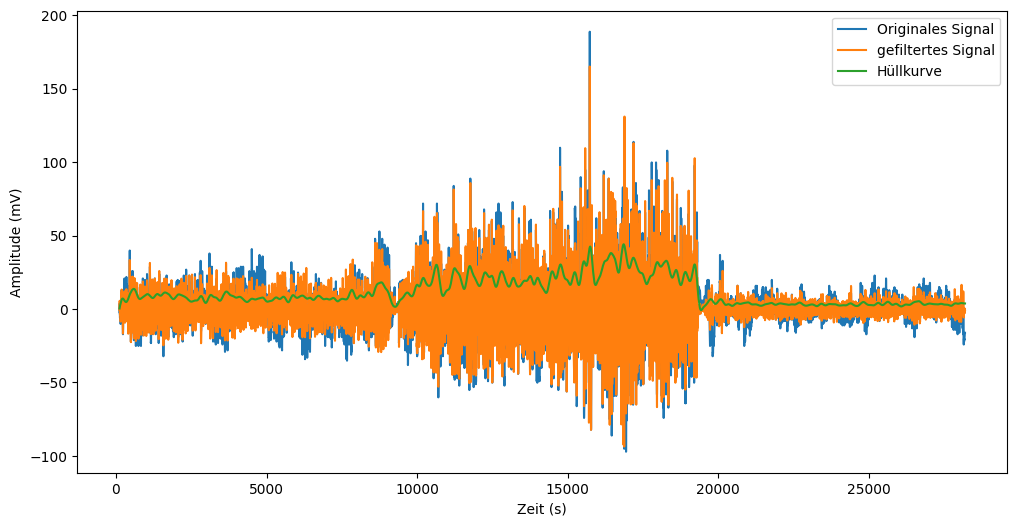

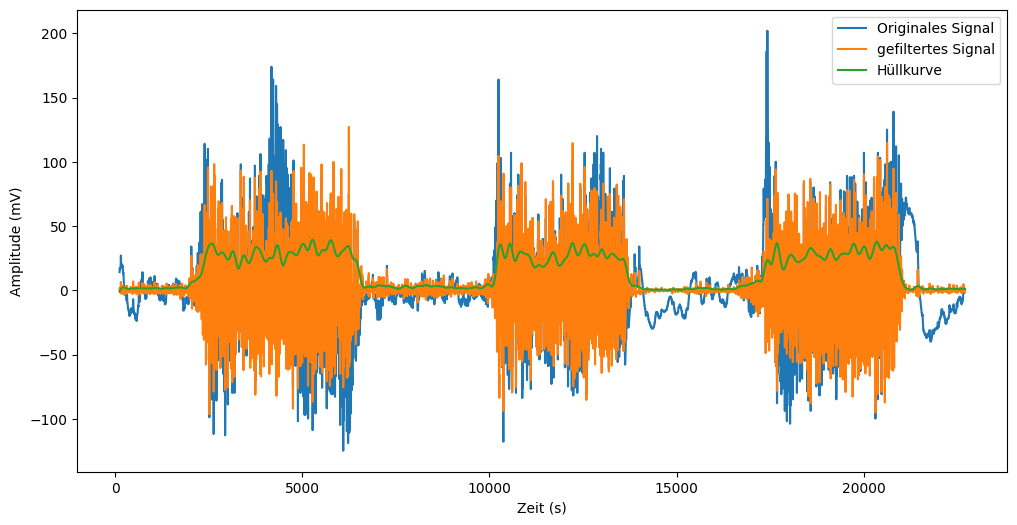

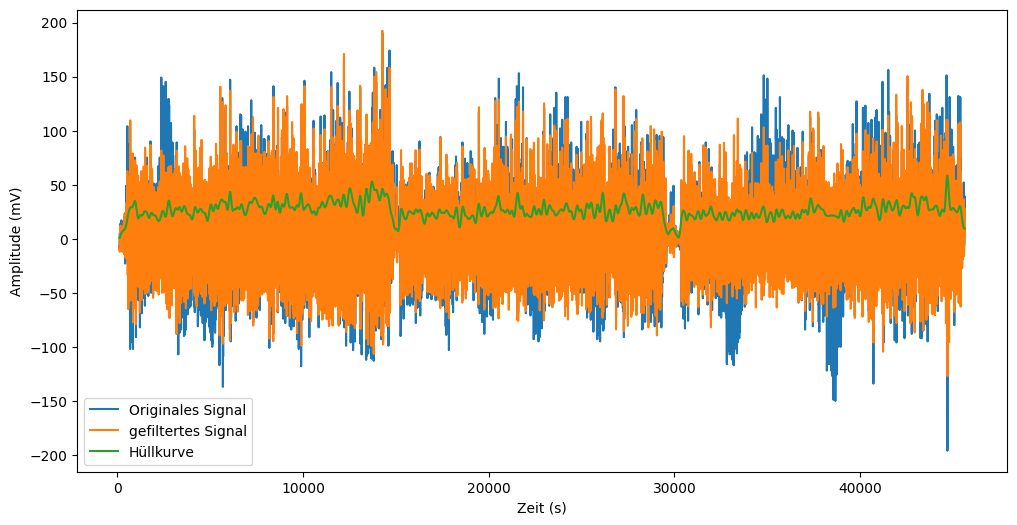

In [7]:
# Define filter functions
def butter_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data)
    return filtered_data

def rectify_signal(data):
    return np.abs(data)

def lowpass_filter(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    low = cutoff / nyquist
    b, a = butter(order, low, btype='low')
    envelope = filtfilt(b, a, data)
    return envelope

# Step 1: Import datasets
separator = '\t'  # Ensure the correct separator is used
weights, mvc, fatigue = import_data(separator)

# Step 2: Preprocess data
sampling_frequency = 1000  # Adjust based on your dataset specifics
lowcut = 20  # 20 Hz for bandpass filter
highcut = 450  # 450 Hz for bandpass filter
envelope_cutoff = 10  # 10 Hz for low-pass filter to detect envelope

# Process each dataset
def process_emg_signal(emg_data, fs):
    # (a) Offset elimination
    emg_data['emg'] -= emg_data['emg'].mean()

    # (b) Bandpass filter
    emg_data['emg_filtered'] = butter_filter(emg_data['emg'], lowcut, highcut, fs)

    # (c) Rectification
    emg_data['emg_rectified'] = rectify_signal(emg_data['emg_filtered'])

    # (d) Envelope (Low-pass filter)
    emg_data['emg_envelope'] = lowpass_filter(emg_data['emg_rectified'], envelope_cutoff, fs)

    return emg_data

weights = process_emg_signal(weights, sampling_frequency)
mvc = process_emg_signal(mvc, sampling_frequency)
fatigue = process_emg_signal(fatigue, sampling_frequency)

# Extract filtered EMG signals for burst detection
mvc_emg_filtered = mvc['emg_filtered'].values
weights_emg_filtered = weights['emg_filtered'].values
fatigue_emg_filtered = fatigue['emg_filtered'].values

# Step 3: Detect bursts using get_bursts function
# Saving plots for manual burst selection
plt.figure(figsize=(12, 6))
plt.plot(mvc_emg_filtered, label='MVC EMG Filtered')
plt.title('MVC EMG Filtered Signal for Burst Detection')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.savefig('mvc_emg_filtered_bursts.png')

plt.figure(figsize=(12, 6))
plt.plot(weights_emg_filtered, label='Weights EMG Filtered')
plt.title('Weights EMG Filtered Signal for Burst Detection')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.savefig('weights_emg_filtered_bursts.png')

plt.figure(figsize=(12, 6))
plt.plot(fatigue_emg_filtered, label='Fatigue EMG Filtered')
plt.title('Fatigue EMG Filtered Signal for Burst Detection')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.savefig('fatigue_emg_filtered_bursts.png')

print("Plots saved as 'mvc_emg_filtered_bursts.png', 'weights_emg_filtered_bursts.png', and 'fatigue_emg_filtered_bursts.png' for manual burst analysis.")

# Placeholder for manual burst detection results
mvc_s, mvc_e, weights_s, weights_e, fatigue_s, fatigue_e = [None] * 6

# Step 4: Visualization of results
def plot_emg_signal(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['t'], data['emg'], label='Originales Signal')
    plt.plot(data['t'], data['emg_filtered'], label='gefiltertes Signal')
    plt.plot(data['t'], data['emg_envelope'], label='Hüllkurve')
    #plt.title(title)
    plt.xlabel('Zeit (s)')
    plt.ylabel('Amplitude (mV)')
    plt.legend()
    plt.show()

plot_emg_signal(weights, 'Weights EMG Signal')
plot_emg_signal(mvc, 'MVC EMG Signal')
plot_emg_signal(fatigue, 'Fatigue EMG Signal')

# Optional: Save processed data
weights.to_csv('weights_processed.csv', index=False)
mvc.to_csv('mvc_processed.csv', index=False)
fatigue.to_csv('fatigue_processed.csv', index=False)


In [6]:
import matplotlib
print(matplotlib.get_backend())
plt.switch_backend('TkAgg')


mvc_s, mvc_e, weights_s, weights_e, fatigue_s, fatigue_e = get_bursts(mvc_emg_filtered, weights_emg_filtered, fatigue_emg_filtered)
print(mvc_s, mvc_e, weights_s, weights_e, fatigue_s, fatigue_e)




module://matplotlib_inline.backend_inline
Click once to start zoom
Select two corners of zoom, enter/return key to finish
Select two corners of zoom, enter/return key to finish
Choose start of activity
Choose end of activity
Click once to start zoom
Select two corners of zoom, enter/return key to finish
Select two corners of zoom, enter/return key to finish
Choose start of activity
Choose end of activity
Click once to start zoom
Select two corners of zoom, enter/return key to finish
Select two corners of zoom, enter/return key to finish
Choose start of activity
Choose end of activity
Click once to start zoom
Select two corners of zoom, enter/return key to finish
Select two corners of zoom, enter/return key to finish
Choose start of activity
Choose end of activity
Click once to start zoom
Select two corners of zoom, enter/return key to finish
Select two corners of zoom, enter/return key to finish
Choose start of activity
Choose end of activity
Click once to start zoom
Select two corners

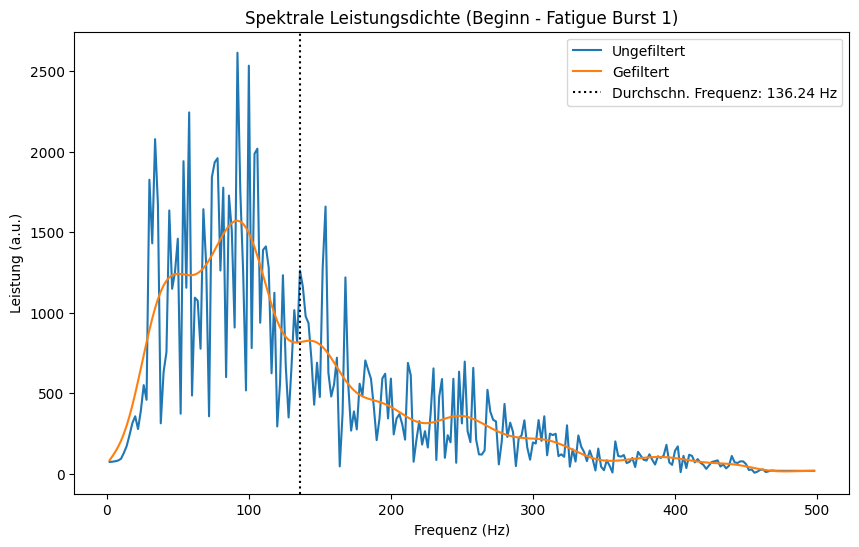

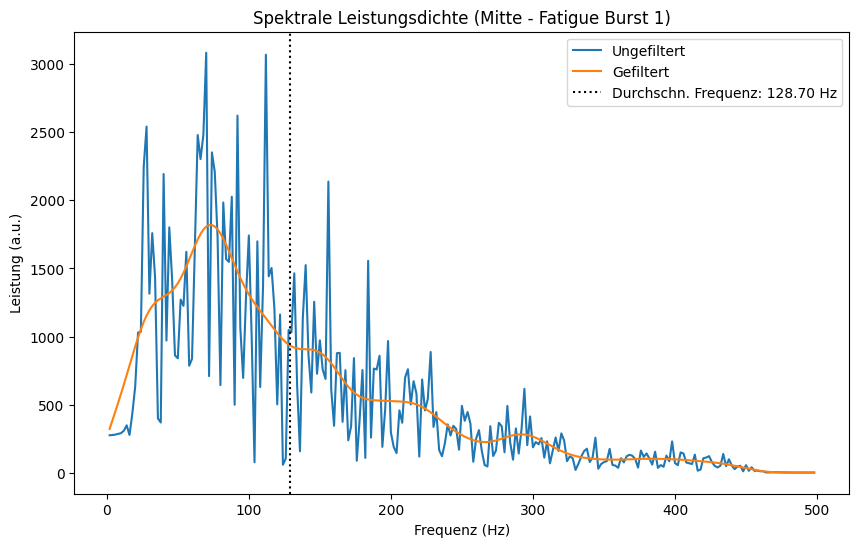

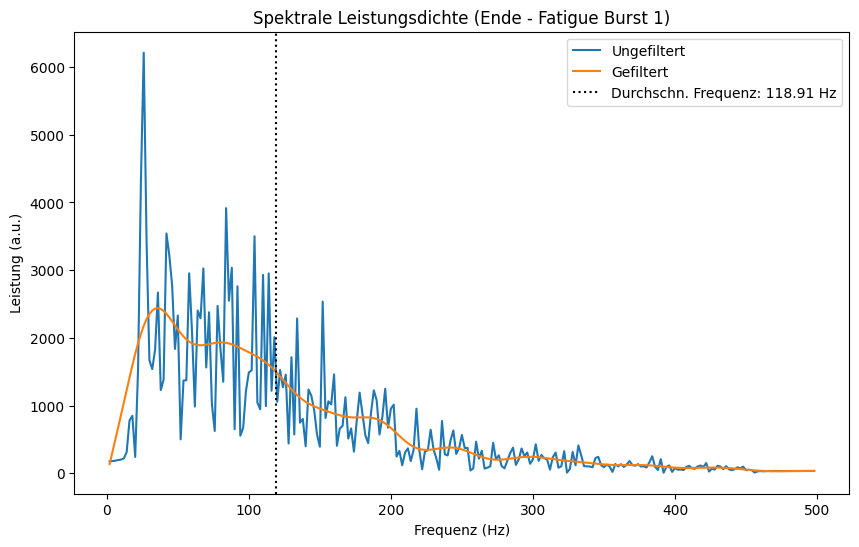

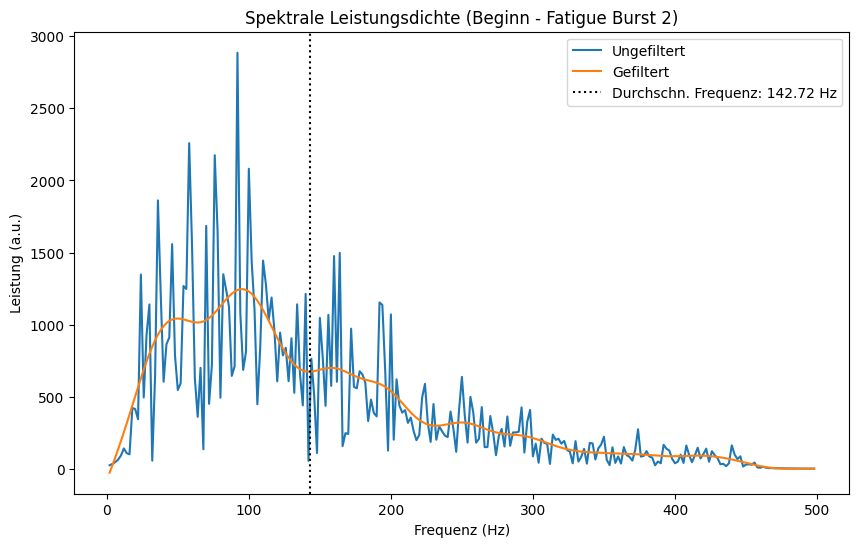

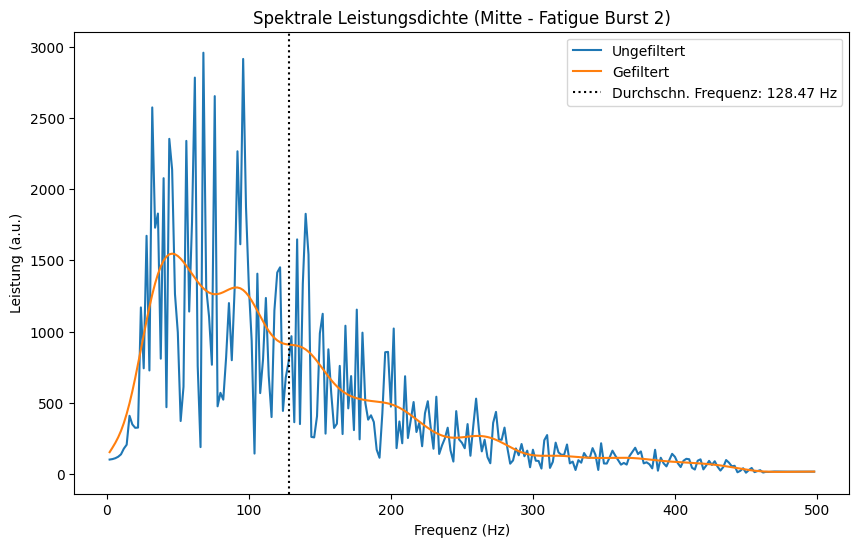

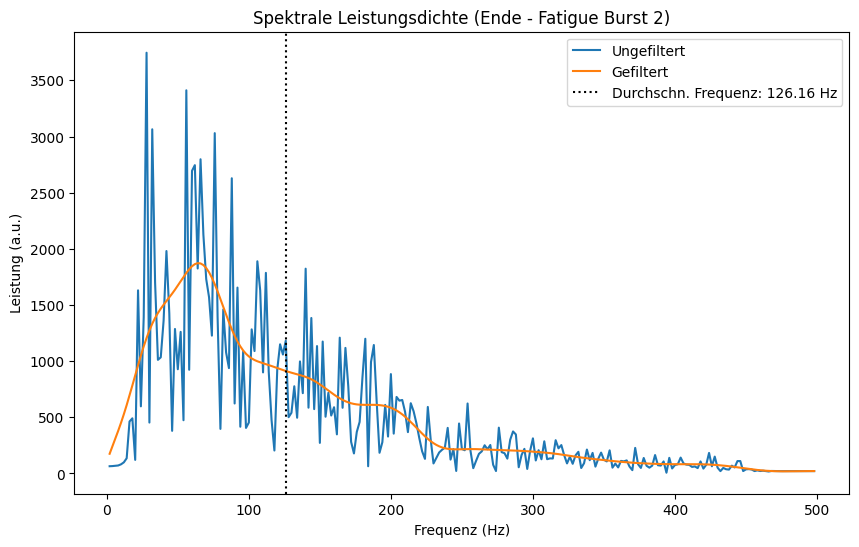

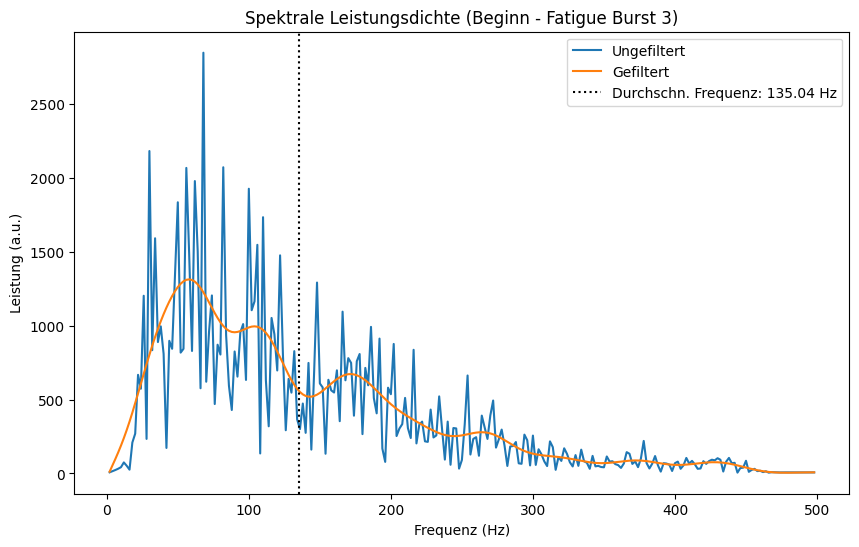

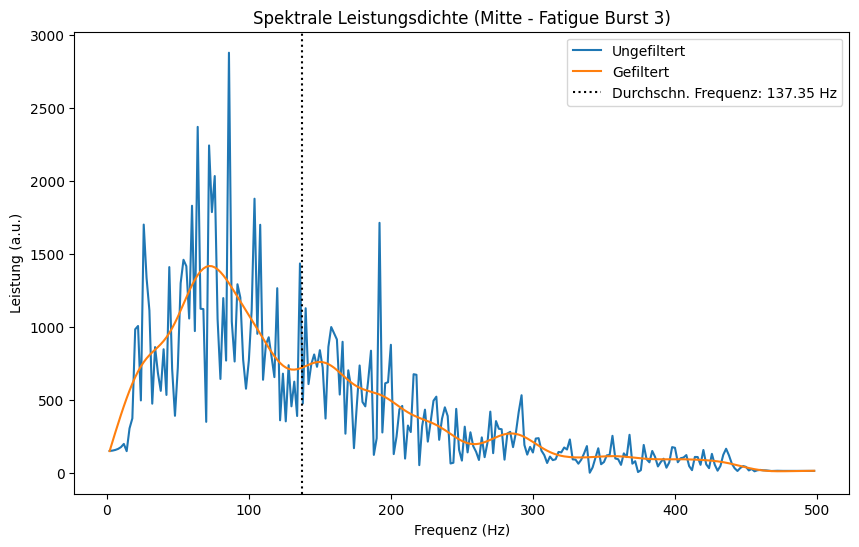

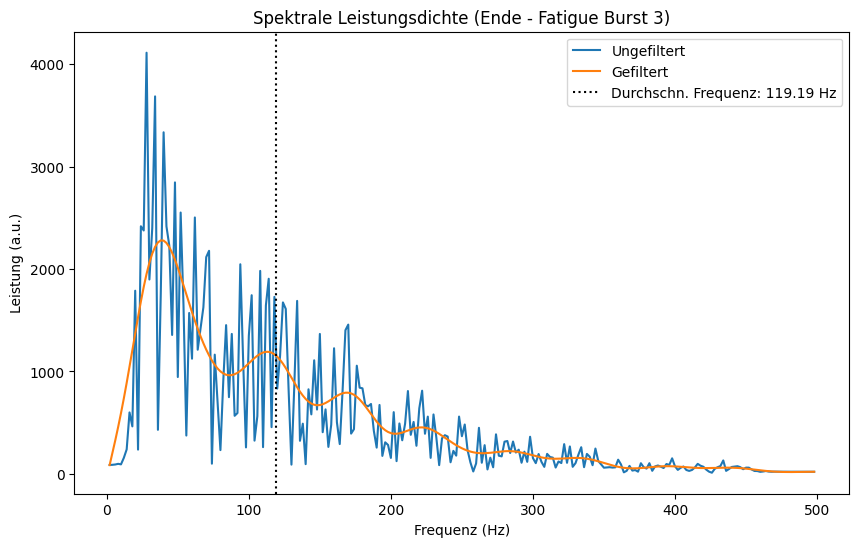

In [20]:
mvc_s= [834, 4110, 7040]
mvc_e= [2551, 5518, 8477]
weights_s = [120, 4016, 8012]
weights_e = [3620,  7797, 11335]
fatigue_s = [202,  6123, 12216]
fatigue_e = [5904, 11775, 18253]

def butter_filter(data, lowcut=None, highcut=None, fs=1000, order=4):
    nyquist = 0.5 * fs
    
    if lowcut is not None and highcut is not None:
        # Bandpass-Filter
        low = lowcut / nyquist
        high = highcut / nyquist
        b, a = butter(order, [low, high], btype='band')
    elif highcut is not None:
        # Lowpass-Filter
        high = highcut / nyquist
        b, a = butter(order, high, btype='low')
    elif lowcut is not None:
        # Highpass-Filter
        low = lowcut / nyquist
        b, a = butter(order, low, btype='high')
    else:
        raise ValueError("Entweder 'lowcut' oder 'highcut' muss definiert sein.")

    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Sampling-Rate und Segmentdauer definieren
segment_duration = 0.5  # in Sekunden
num_points = int(sampling_frequency * segment_duration)  # Punkte für 0.5 Sekunden

# Hilfsfunktion zum Isolieren von Segmenten
def isolate_segment(emg_data, start_time, fs, duration):
    start_idx = int(start_time * fs)
    end_idx = start_idx + int(duration * fs)
    return emg_data[start_idx:end_idx]

# 1. Segmente isolieren und alle Fatigue-Bursts durchlaufen
for i in range(len(fatigue_s)):  # Schleife über alle Bursts
    fatigue_start, fatigue_end = fatigue_s[i], fatigue_e[i]
    
    # Beginn, Mitte und Ende isolieren
    fatigue_begin_segment = isolate_segment(fatigue_emg_filtered, fatigue_start / sampling_frequency, sampling_frequency, segment_duration)
    fatigue_middle_segment = isolate_segment(fatigue_emg_filtered, (fatigue_start + fatigue_end) / 2 / sampling_frequency, sampling_frequency, segment_duration)
    fatigue_end_segment = isolate_segment(fatigue_emg_filtered, fatigue_end / sampling_frequency - segment_duration, sampling_frequency, segment_duration)

    # 2. Spektrale Leistungsdichte berechnen
    power_begin, freqs_begin = get_power(fatigue_begin_segment, sampling_frequency)
    power_middle, freqs_middle = get_power(fatigue_middle_segment, sampling_frequency)
    power_end, freqs_end = get_power(fatigue_end_segment, sampling_frequency)

    # 3. Spektrale Leistungsdichte filtern (Butterworth Lowpass-Filter)
    filtered_power_begin = butter_filter(power_begin, highcut=40, fs=sampling_frequency)
    filtered_power_middle = butter_filter(power_middle, highcut=40, fs=sampling_frequency)
    filtered_power_end = butter_filter(power_end, highcut=40, fs=sampling_frequency)

    # Durchschnittliche Frequenzen berechnen
    avg_freq_begin = np.sum(freqs_begin * filtered_power_begin) / np.sum(filtered_power_begin)
    avg_freq_middle = np.sum(freqs_middle * filtered_power_middle) / np.sum(filtered_power_middle)
    avg_freq_end = np.sum(freqs_end * filtered_power_end) / np.sum(filtered_power_end)

    # 4. Ergebnisse visualisieren
    def plot_spectral_analysis(freqs, power, filtered_power, avg_freq, title):
        plt.figure(figsize=(10, 6))
        plt.plot(freqs, power, label="Ungefiltert")
        plt.plot(freqs, filtered_power, label="Gefiltert", linestyle="-")
        plt.axvline(avg_freq, color='black', linestyle=':', label=f"Durchschn. Frequenz: {avg_freq:.2f} Hz")
        plt.title(title)
        plt.xlabel("Frequenz (Hz)")
        plt.ylabel("Leistung (a.u.)")
        plt.legend()
        plt.show()

    # Diagramme für den aktuellen Burst anzeigen
    plot_spectral_analysis(freqs_begin, power_begin, filtered_power_begin, avg_freq_begin, f"Spektrale Leistungsdichte (Beginn - Fatigue Burst {i+1})")
    plot_spectral_analysis(freqs_middle, power_middle, filtered_power_middle, avg_freq_middle, f"Spektrale Leistungsdichte (Mitte - Fatigue Burst {i+1})")
    plot_spectral_analysis(freqs_end, power_end, filtered_power_end, avg_freq_end, f"Spektrale Leistungsdichte (Ende - Fatigue Burst {i+1})")
